In [148]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [149]:
tf.__version__

'2.9.0'

In [150]:
if not os.path.exists("tf_cv_helper.py"):
    !wget https://raw.githubusercontent.com/ngohongthai/ml_helper/main/tf_cv_helper.py
else:
    print("[INFO] 'tf_cv_helper.py' already exists, skipping download.")

import tf_cv_helper as helper

[INFO] 'tf_cv_helper.py' already exists, skipping download.


In [151]:
# Make circle dataset with 2000 samples
from sklearn.datasets import make_circles

n_samples = 2000

X, y = make_circles(n_samples=n_samples, 
                    noise=0.03, 
                    random_state=42)


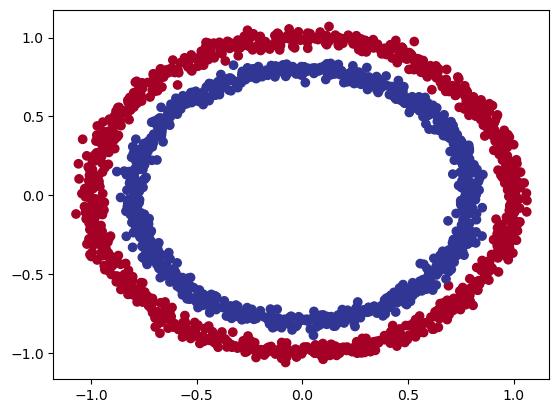

In [152]:
# Plot the data
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [153]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
X_train.shape, y_train.shape

((1600, 2), (1600,))

### Thiết lập mô hình

In [155]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Thiết lập random seed
tf.random.set_seed(42)

# 1. Tạo mô hình sử dụng Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Biên dịch mô hình
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # là nhị phân vì chúng ta chỉ hoạt động với 2 lớp (0 và 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Khớp mô hình
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
 9/50 [====>.........................] - ETA: 0s - loss: 3.7010 - accuracy: 0.4236

2023-01-08 16:43:47.868787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 0s 5ms/step - loss: 4.5310 - accuracy: 0.5094
Epoch 2/5
50/50 [==============================] - 0s 4ms/step - loss: 4.8039 - accuracy: 0.5406
Epoch 3/5
50/50 [==============================] - 0s 4ms/step - loss: 4.6930 - accuracy: 0.5375
Epoch 4/5
50/50 [==============================] - 0s 4ms/step - loss: 4.6787 - accuracy: 0.5387
Epoch 5/5
50/50 [==============================] - 0s 4ms/step - loss: 4.5985 - accuracy: 0.5356


In [156]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (32, 1)                   3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_1.evaluate(X_test, y_test)

13/13 [==============================] - 0s 8ms/step - loss: 4.7465 - accuracy: 0.5200


2023-01-08 16:43:49.111755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4.746450901031494, 0.5199999809265137]

In [158]:
# Huấn luyện mô hình 1 lâu hơn
history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [159]:
model_1.evaluate(X_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 7.8286 - accuracy: 0.4925


[7.828566551208496, 0.492499977350235]

In [160]:
## Thêm layer

model_2 = Sequential([
    layers.Dense(1),
    layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

2023-01-08 16:44:04.803059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [161]:
model_2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5075


2023-01-08 16:44:22.488155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6931682229042053, 0.5074999928474426]

In [162]:
# Thêm nhiều layer hơn

model_3 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=100, verbose=0)

2023-01-08 16:44:22.819291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [163]:
model_3.evaluate(X_test, y_test)

13/13 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.5525


2023-01-08 16:44:47.050377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6947277188301086, 0.5525000095367432]

 91/313 [=======>......................] - ETA: 0s

2023-01-08 16:44:47.257815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


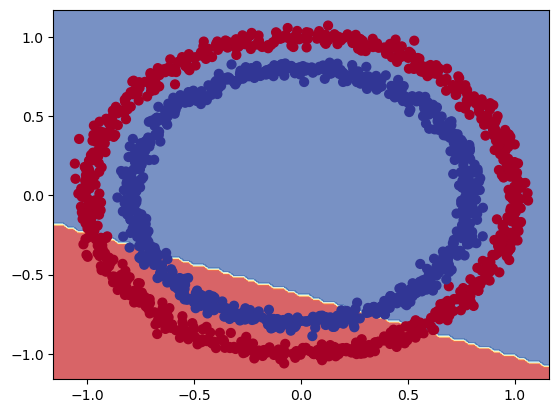

In [164]:
def plot_decision_boundary(model, X, y):
  """
  Vẽ biểu đồ ranh giới quyết định do mô hình dự đoán trên X tạo ra.
  Hàm này được mô phỏng từ 2 nguồn:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid Xác định ranh giới trục của biểu đồ và tạo meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Tạo các giá trị X (chúng ta sẽ dự đoán trên tất cả các giá trị)
  x_in = np.c_[xx.ravel(), yy.ravel()] # chồng các mảng 2D với nhau: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Đưa ra dự đoán sử dụng mô hình đã huấn luyện
  y_pred = model.predict(x_in)

  # Kiểm tra cho đa lớp
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # Chúng ta cần reshape các dự đoán để chuẩn bị vẽ biểu đồ
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Vẽ biểu đồ ranh giới quyết định
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

plot_decision_boundary(model_3, X_train, y_train)

In [165]:
model_3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 100)               300       
                                                                 
 dense_45 (Dense)            (None, 10)                1010      
                                                                 
 dense_46 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


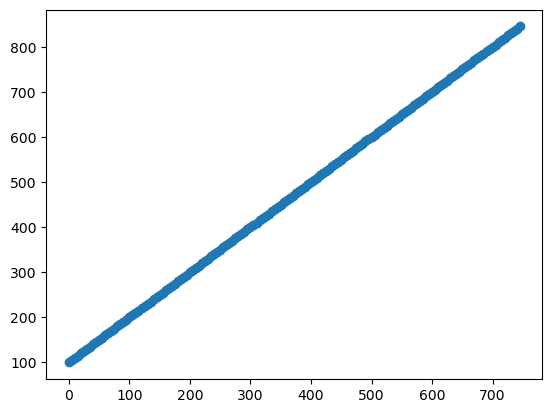

In [166]:
## Thử với dữ liệu liner
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo một số dữ liệu hồi quy
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Chia thành tập huấn luyện và tập kiểm tra
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

plt.scatter(X_reg_train, y_reg_train)

In [167]:
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [168]:
# Tạo model hồi  quy
tf.random.set_seed(42)

model_3 = Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [169]:
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

2023-01-08 16:44:48.288302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 9ms/step


2023-01-08 16:44:51.032237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


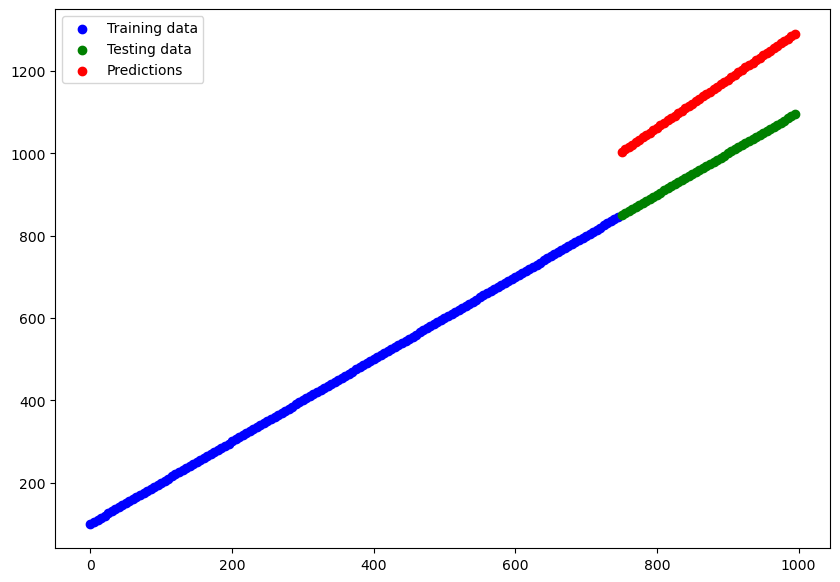

In [170]:
y_reg_preds = model_3.predict(y_reg_test)

# Vẽ các dự đoán của mô hình so với dữ liệu hồi quy
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

In [171]:
## Thêm thành phần non-linear vào mô hình

model_4 = Sequential([
    layers.Dense(1, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_4 = model_4.fit(X_train, y_train, epochs=100, verbose=0)

2023-01-08 16:44:51.294428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 94/313 [========>.....................] - ETA: 0s

2023-01-08 16:45:12.548879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


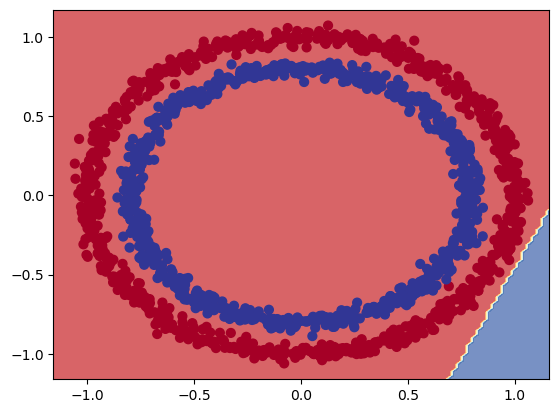

In [172]:
plot_decision_boundary(model_4, X_train, y_train)

In [173]:
model_4.evaluate(X_test, y_test)

13/13 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.4925


2023-01-08 16:45:13.243843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6932229399681091, 0.492499977350235]

In [174]:
# Tiep tuc cai thien
model_5 = Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model_5.compile(optimizer='adam', 
                 loss=tf.keras.losses.binary_crossentropy, 
                 metrics=['accuracy'])

model_5.fit(X_train, y_train, epochs=100, verbose=0)

2023-01-08 16:45:13.563990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 92/313 [=======>......................] - ETA: 0s

2023-01-08 16:45:35.332331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


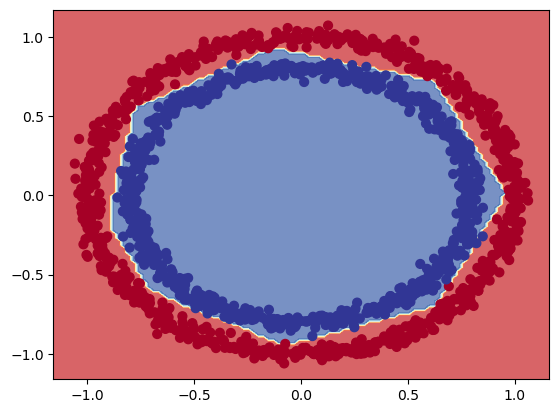

In [175]:
plot_decision_boundary(model_5, X_train, y_train)

In [176]:
model_5.evaluate(X_test, y_test)

13/13 [==============================] - 0s 8ms/step - loss: 0.0968 - accuracy: 0.9925


2023-01-08 16:45:36.048941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.09683675318956375, 0.9925000071525574]

In [177]:
## Sử dụng learning rate callback
from tensorflow.keras.layers import  Dense
from tensorflow.keras.models import Sequential

model_6 = Sequential([
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_6 = model_6.fit(X_train, y_train, epochs=100, callbacks=[lr_schedule], verbose=0)


2023-01-08 16:45:36.382539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Text(0.5, 1.0, 'Learning rate vs. loss')

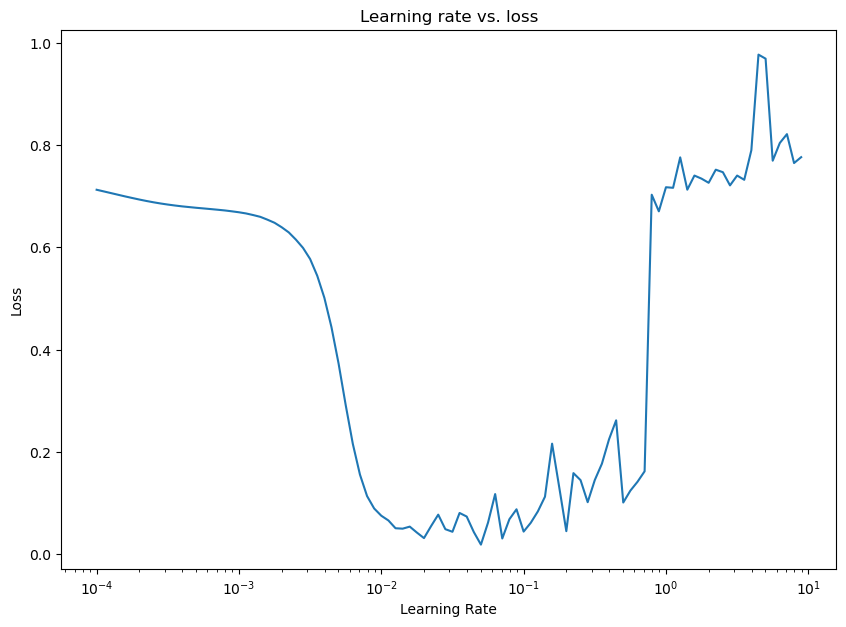

In [178]:
# Vẽ biểu đồ learning rate với loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_6.history["loss"]) # muốn trục x (learning rate) theo thang log
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

## Phân loại đa lớp

In [180]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

In [181]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [183]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, '9')

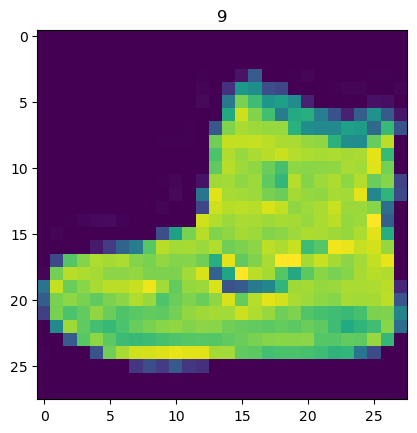

In [185]:
plt.imshow(train_data[0])
plt.title(train_label[0])

In [186]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Có bao nhiêu lớp (đây sẽ là shape đầu ra)?
len(class_names)

10

In [189]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

tf.random.set_seed(42)

model_11 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

model_11.compile(optimizer='adam', 
                  loss= SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history_11 = model_11.fit(train_data, train_label, epochs=5, validation_data=(test_data, test_label))


Epoch 1/5


2023-01-08 17:29:46.427815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 2.1703 - accuracy: 0.1616

2023-01-08 17:29:57.677944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 6ms/step - loss: 2.1701 - accuracy: 0.1616 - val_loss: 1.7939 - val_accuracy: 0.2043
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7036 - accuracy: 0.2524 - val_loss: 1.6463 - val_accuracy: 0.2843
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6321 - accuracy: 0.2816 - val_loss: 1.6055 - val_accuracy: 0.2854
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6044 - accuracy: 0.2868 - val_loss: 1.6007 - val_accuracy: 0.2949
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5852 - accuracy: 0.2955 - val_loss: 1.5799 - val_accuracy: 0.3103


In [190]:
normal_train_data = train_data / 255.0
normal_test_data = test_data / 255.0

In [192]:
model_12 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

model_12.compile(optimizer='adam', 
                 loss=SparseCategoricalCrossentropy(), 
                 metrics=['accuracy'])

history12 = model_12.fit(normal_train_data, 
             train_label, 
             epochs=5, 
             validation_data=(normal_test_data, test_label))

Epoch 1/5
  16/1875 [..............................] - ETA: 12s - loss: 2.2568 - accuracy: 0.0176

2023-01-08 17:38:20.262574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1867/1875 [============================>.] - ETA: 0s - loss: 1.2821 - accuracy: 0.5469

2023-01-08 17:38:31.017093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 1.2800 - accuracy: 0.5474 - val_loss: 0.8367 - val_accuracy: 0.6707
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7376 - accuracy: 0.7114 - val_loss: 0.6978 - val_accuracy: 0.7354
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6554 - accuracy: 0.7502 - val_loss: 0.6627 - val_accuracy: 0.7529
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6213 - accuracy: 0.7699 - val_loss: 0.6502 - val_accuracy: 0.7569
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5955 - accuracy: 0.7787 - val_loss: 0.6255 - val_accuracy: 0.7714


In [198]:
# Find the best learning rats
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model_13 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

model_13.compile(optimizer=Adam(), 
                  loss=SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

lr_history = model_13.fit(normal_train_data,
                          train_label,
                          epochs=40,
                          validation_data=(normal_test_data, test_label), 
                          callbacks=[lr_schedule], verbose=0)


2023-01-08 18:01:59.125739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-08 18:02:07.926197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [199]:
def plot_learning_rate_and_loss(history, epochs):
    # Vẽ biểu đồ learning rate với loss
    lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
    plt.figure(figsize=(10, 7))
    plt.semilogx(lrs, history["loss"]) # muốn trục x (learning rate) theo thang log
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning rate vs. loss")

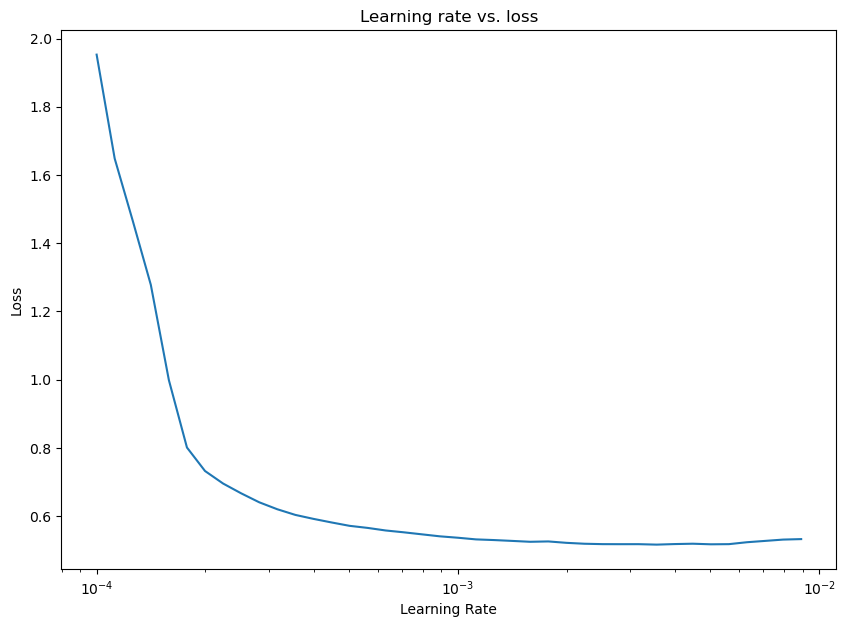

In [200]:
plot_learning_rate_and_loss(lr_history.history, 40)

In [201]:
# Test với learning rate = 0.001

model_14 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

model_14.compile(optimizer= Adam(lr = 0.001), 
                  loss= SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
history_14 = model_14.fit(normal_train_data, 
                          train_label, 
                          epochs=20, 
                          validation_data=(normal_test_data, test_label))


Epoch 1/20
  17/1875 [..............................] - ETA: 12s - loss: 2.2033 - accuracy: 0.1893

2023-01-08 18:17:42.274010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1867/1875 [============================>.] - ETA: 0s - loss: 1.3807 - accuracy: 0.5178

2023-01-08 18:17:53.087747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 1.3789 - accuracy: 0.5186 - val_loss: 1.0502 - val_accuracy: 0.6710
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8661 - accuracy: 0.7064 - val_loss: 0.7918 - val_accuracy: 0.7053
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7352 - accuracy: 0.7316 - val_loss: 0.7393 - val_accuracy: 0.7127
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6919 - accuracy: 0.7477 - val_loss: 0.6970 - val_accuracy: 0.7439
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6715 - accuracy: 0.7564 - val_loss: 0.7070 - val_accuracy: 0.7517
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6535 - accuracy: 0.7634 - val_loss: 0.6753 - val_accuracy: 0.7638
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6400 - accuracy: 0.7687 - val_loss: 0.6905 - val_accuracy: 0.7

In [202]:
# Download helper
if not os.path.exists("tf_cv_helper.py"):
    !wget https://raw.githubusercontent.com/ngohongthai/ml_helper/main/tf_cv_helper.py
else:
    print("[INFO] 'tf_cv_helper.py' already exists, skipping download.")

import tf_cv_helper as helper

# Sử dụng trong file notebook để auto reload những thay đổi có trong file helper (nếu có)
%reload_ext autoreload
%autoreload 2

--2023-01-08 18:21:43--  https://raw.githubusercontent.com/ngohongthai/ml_helper/main/tf_cv_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21645 (21K) [text/plain]
Saving to: ‘tf_cv_helper.py’

tf_cv_helper.py     100%[===================>]  21.14K  --.-KB/s    in 0.07s   

2023-01-08 18:21:44 (311 KB/s) - ‘tf_cv_helper.py’ saved [21645/21645]



In [204]:
y_probs = model_14.predict(normal_test_data)
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

313/313 [==============================] - 1s 2ms/step


(9, 'Ankle boot')

In [205]:
# Chuyển toàn bộ dự đoán từ xác suất thành nhãn
y_preds = y_probs.argmax(axis=1)

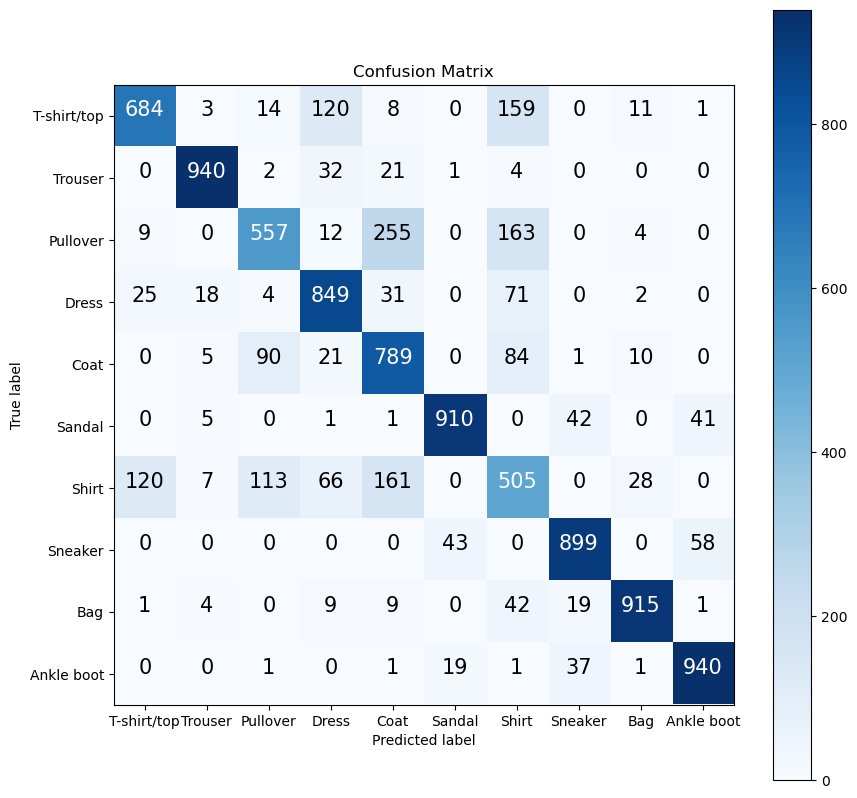

In [206]:
helper.make_confusion_matrix(test_label, y_preds, classes=class_names)

1/1 [==============================] - 0s 258ms/step


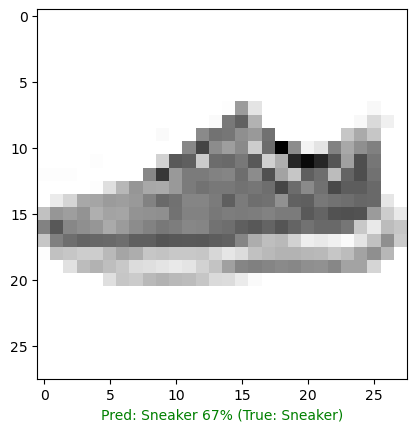

In [207]:
helper.plot_random_image(model_14, 
                         normal_test_data, 
                         test_label, 
                         class_names)

In [208]:
model_14.layers

In [210]:
weights, biases = model_14.layers[1].get_weights()

In [212]:
weights.shape, biases.shape

((784, 4), (4,))

In [218]:
from tensorflow.keras.utils import plot_model

plot_model(model_14)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### BTVN

In [221]:
# Tạo dữ liệu bằng hàm make_moons
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

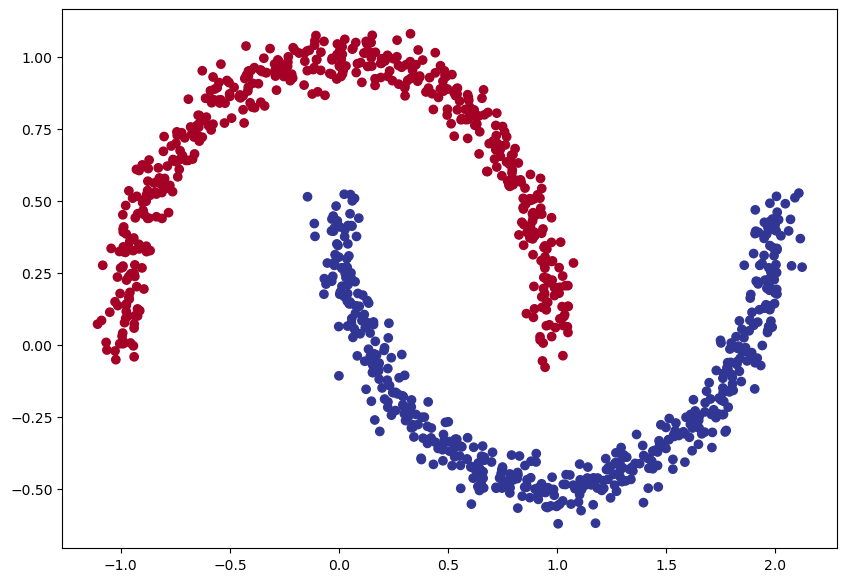

In [222]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [223]:
model = Sequential([
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=100)

Epoch 1/100


2023-01-08 21:37:04.709961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 14ms/step - loss: 0.6739 - accuracy: 0.7900
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6364 - accuracy: 0.8240
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.5688 - accuracy: 0.8510
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4853 - accuracy: 0.8580
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 0.4082 - accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.3425 - accuracy: 0.8650
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2921 - accuracy: 0.8700
Epoch 8/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2571 - accuracy: 0.8730
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.2356 - accuracy: 0.8770
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.2098 - accuracy: 0.9000
Epoch 11/100
32/32

 62/313 [====>.........................] - ETA: 0s

2023-01-08 21:38:29.920048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


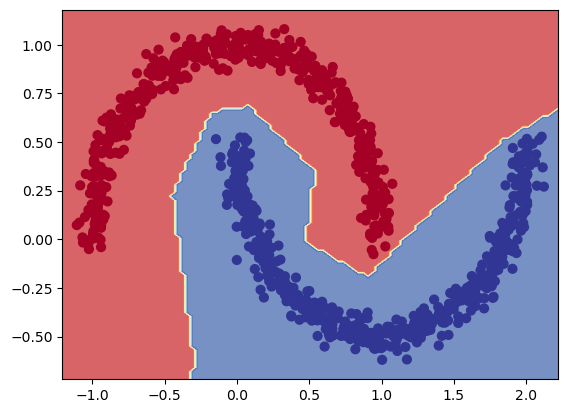

In [224]:
plot_decision_boundary(model, X, y)